# Option 1

In this workflow, the intend is to calibrate the glen parameter A to be the closest from the one of the consensus or of Millan observations.

In [1]:
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm as colormap
from oggm import cfg, utils, workflow, tasks, graphics
import pandas as pd
import numpy as np
from oggm.shop import bedtopo,gcm_climate

import add_data
import work_tasks
import graph

cfg.initialize(logging_level='WARNING')
cfg.PATHS['working_dir'] =  '/home/lucillegimenes/oggm-workflow-b/'
cfg.PARAMS['use_multiprocessing']=True
cfg.PARAMS['store_fl_diagnostics'] = True
cfg.PARAMS['store_model_geometry'] = True


rgi_ids = ['RGI60-11.01450'] 

# The RGI version to use
# Size of the map around the glacier.
prepro_border = 80
# Degree of processing level. This is OGGM specific and for the shop 1 is the one you want
from_prepro_level = 3
# URL of the preprocessed gdirs
base_url = 'https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.4/L3-L5_files/CRU/elev_bands/qc3/pcp2.5/no_match/'

2021-11-15 18:28:15: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2021-11-15 18:28:15: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2021-11-15 18:28:15: oggm.cfg: Multiprocessing: using all available processors (N=8)
2021-11-15 18:28:15: oggm.cfg: Multiprocessing switched ON after user settings.
2021-11-15 18:28:15: oggm.cfg: PARAMS['store_fl_diagnostics'] changed from `False` to `True`.
2021-11-15 18:28:15: oggm.cfg: PARAMS['store_model_geometry'] changed from `False` to `True`.


## Get Millan volume

In [195]:
gdirs = workflow.init_glacier_directories(rgi_ids,
                                          from_prepro_level=from_prepro_level,
                                          prepro_base_url=base_url,
                                          prepro_border=prepro_border)
gdir=gdirs[0]

gdir.name_corr=gdir.name.replace('/','-')
if (gdir.name==''):
    gdir.name_corr='Aletsch'
    
    
#Little adjustment  
if (gdir.rgi_region in ['13','14','15']):
    gdir.rgi_region_m='13-15'
else:
    gdir.rgi_region_m=gdir.rgi_region

add_data.add_data_thickness(gdir,'/home/lucillegimenes/Bureau/THICKNESS_Millan/RGI-'+gdir.rgi_region_m+'/per_glacier/'+gdir.rgi_id+'_thickness_m_from_f.tif')
 
    
with xr.open_dataset(gdir.get_filepath('gridded_data')) as ds:
    ds = ds.load()
    
#new dataframe to add
vol=int(ds.millan_thickness.where(ds.glacier_mask==1).sum())*(int(ds.y[0]-ds.y[1])**2)
columns=['volume_m3']
index=[gdir.rgi_id]
df=pd.DataFrame(data=vol,index=index,columns=columns)
df.index.name='RGIId'

old=pd.read_hdf('/home/lucillegimenes/volumes_millan.h5')

new=pd.concat([old,df],axis=0)

#save 
store = pd.HDFStore('volumes_millan.h5')
store.put('dataset_01', new)
store.close()


NameError: name 'base_url' is not defined

### Checking if everything alright

In [3]:
test=pd.read_hdf('/home/lucillegimenes/volumes_millan.h5')
test

,volume_m3
RGIId,
RGI60-11.01450,16401722337
RGI60-11.03684,408418920
RGI60-11.03643,2457668354
RGI60-11.03638,1179496804
RGI60-14.00005,146864080000
...,...
RGI60-13.52589,2884376152
RGI60-13.52594,5556978966
RGI60-13.52609,735025632


## Calibrating the volume on the observations

Before running simulations, we have to examine how evolves the ice thickness along the flowline regarding the original thicknesses from Farinotti or Millan

2021-11-15 13:41:57: oggm.workflow: init_glacier_directories from prepro level 3 on 1 glaciers.
2021-11-15 13:41:57: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers
2021-11-15 13:41:57: oggm.workflow: Execute entity tasks [glacier_masks] on 1 glaciers
2021-11-15 13:41:57: oggm.workflow: Execute entity tasks [compute_centerlines] on 1 glaciers
2021-11-15 13:41:57: oggm.workflow: Execute entity tasks [initialize_flowlines] on 1 glaciers
2021-11-15 13:41:57: oggm.workflow: Execute entity tasks [compute_downstream_line] on 1 glaciers
2021-11-15 13:41:58: oggm.workflow: Execute entity tasks [compute_downstream_bedshape] on 1 glaciers
2021-11-15 13:41:58: oggm.workflow: Execute entity tasks [catchment_area] on 1 glaciers
2021-11-15 13:41:59: oggm.workflow: Execute entity tasks [catchment_intersections] on 1 glaciers
2021-11-15 13:41:59: oggm.workflow: Execute entity tasks [catchment_width_geom] on 1 glaciers
2021-11-15 13:41:59: oggm.workflow: Execute entity tasks [catch

2021-11-15 13:42:08: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers
2021-11-15 13:42:08: oggm.workflow: Execute entity tasks [glacier_masks] on 1 glaciers
2021-11-15 13:42:08: oggm.workflow: Execute entity tasks [compute_centerlines] on 1 glaciers
2021-11-15 13:42:08: oggm.workflow: Execute entity tasks [initialize_flowlines] on 1 glaciers
2021-11-15 13:42:08: oggm.workflow: Execute entity tasks [compute_downstream_line] on 1 glaciers
2021-11-15 13:42:09: oggm.workflow: Execute entity tasks [compute_downstream_bedshape] on 1 glaciers
2021-11-15 13:42:09: oggm.workflow: Execute entity tasks [catchment_area] on 1 glaciers
2021-11-15 13:42:10: oggm.workflow: Execute entity tasks [catchment_intersections] on 1 glaciers
2021-11-15 13:42:10: oggm.workflow: Execute entity tasks [catchment_width_geom] on 1 glaciers
2021-11-15 13:42:10: oggm.workflow: Execute entity tasks [catchment_width_correction] on 1 glaciers
2021-11-15 13:42:12: oggm.workflow: Execute entity tasks [l

ValueError: calibration from millan estimate CAN'T converge with fs=0.
Bound values (km3):
Ref=0.553 OGGM=0.510 for A factor 0.1
Ref=0.553 OGGM=0.205 for A factor 10

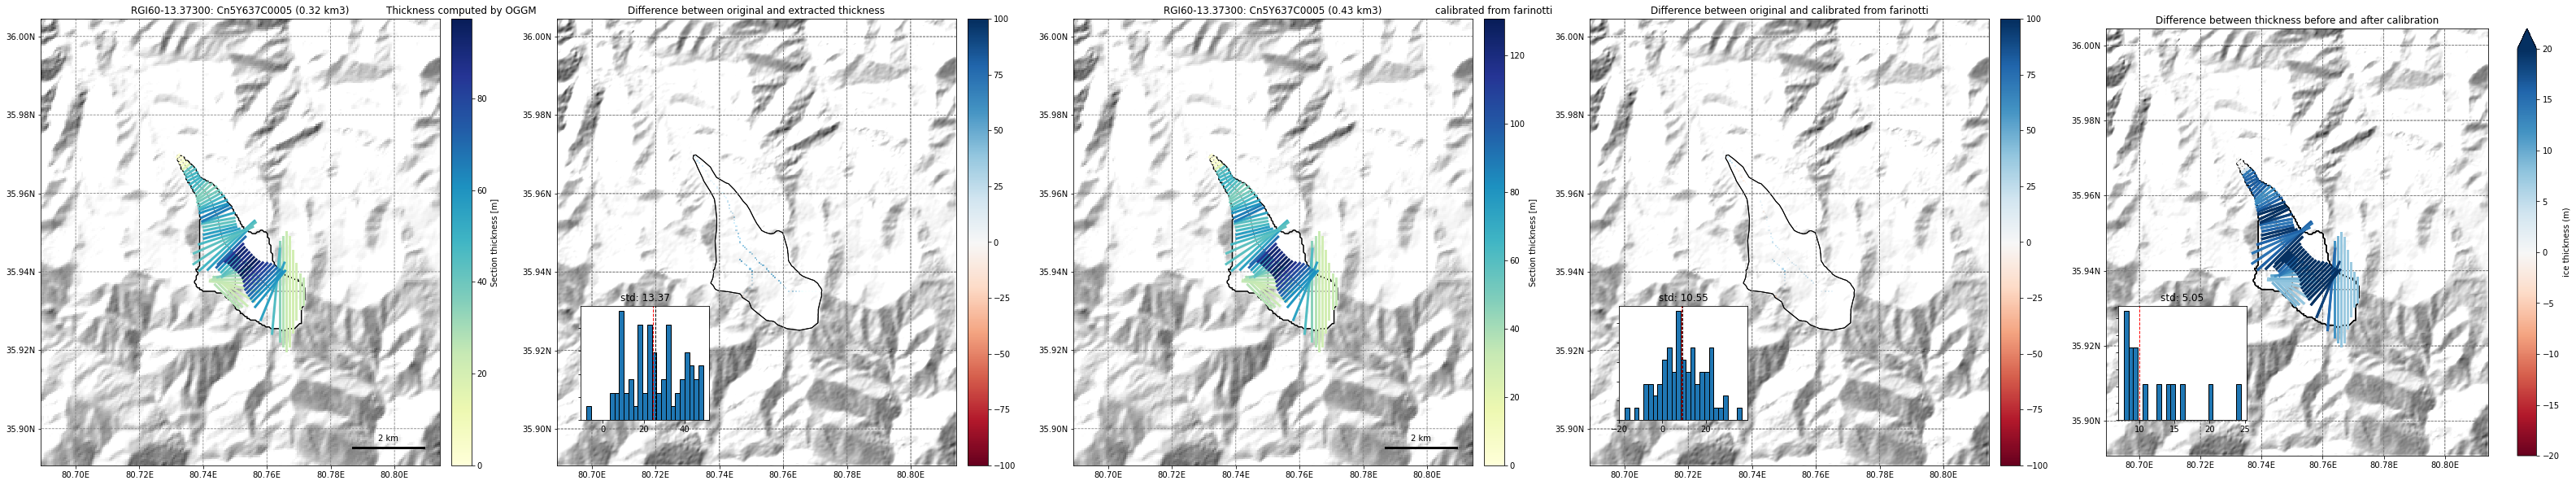

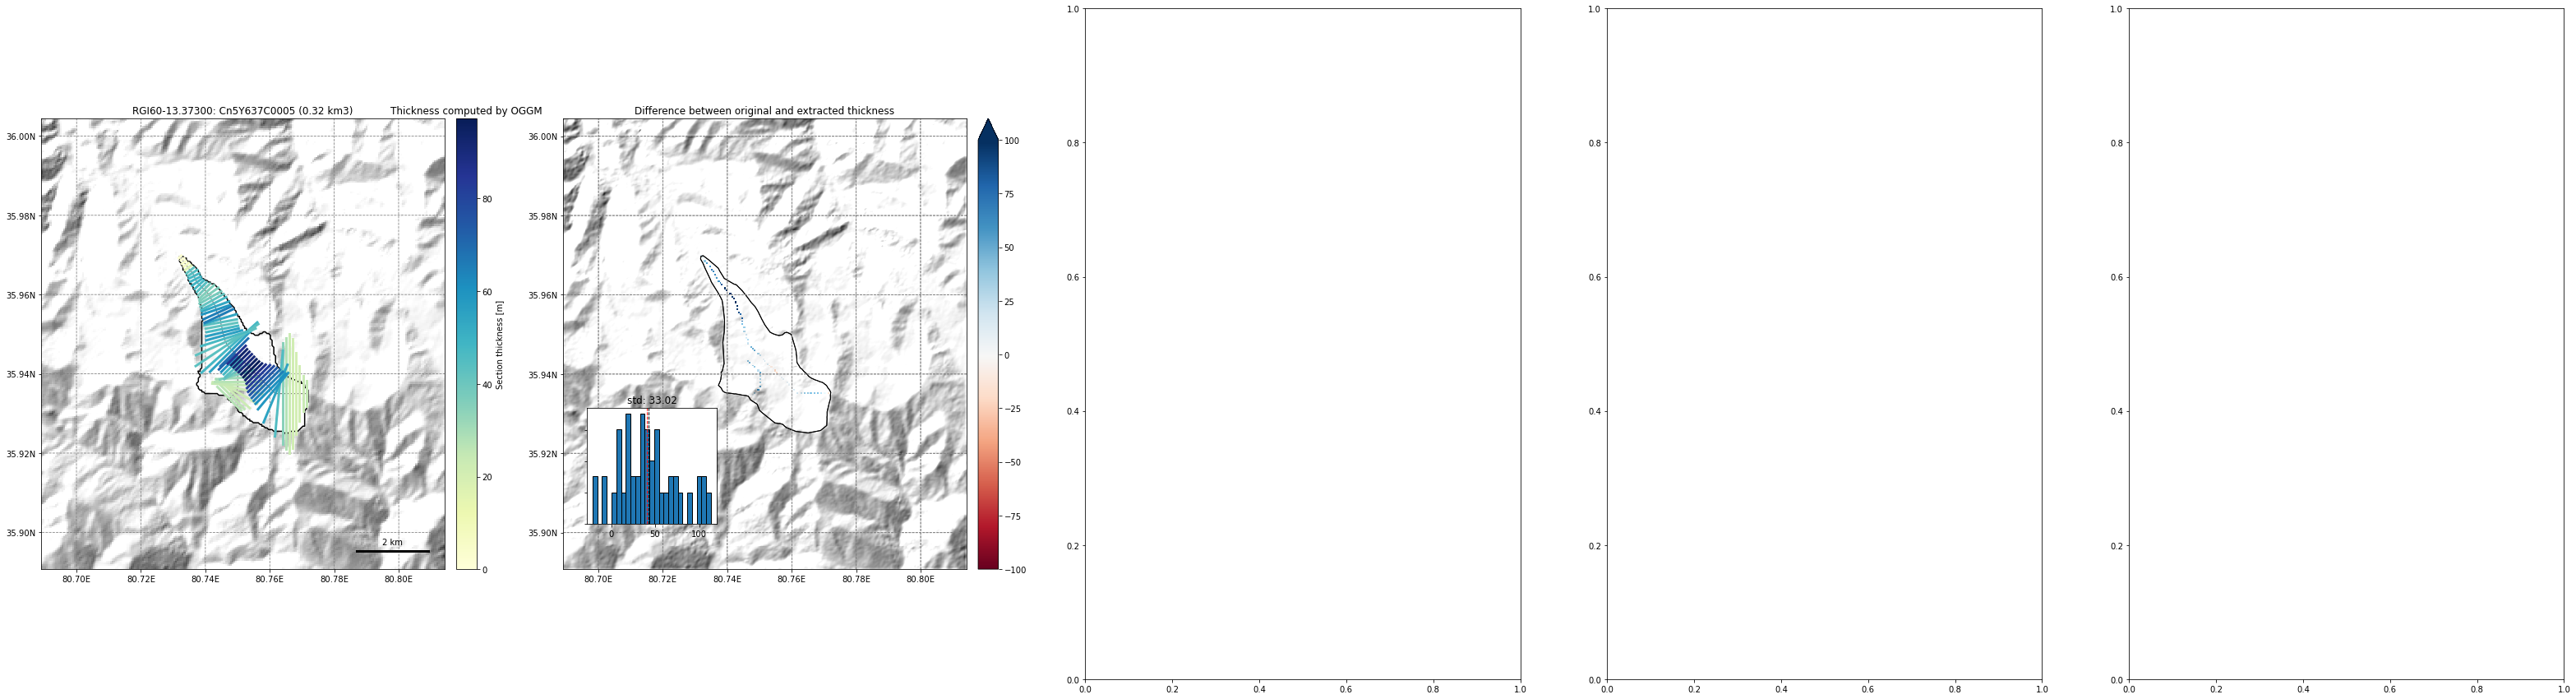

In [18]:
import work_tasks
import statistics

orig_cmap = matplotlib.cm.RdBu
diag={'farinotti':[0,0],'millan':[0,0]}
eps={'farinotti':0,'millan':0}

k=0
path_to_hdf='/home/lucillegimenes/volumes_millan_rgi13.h5'

for data in ['farinotti','millan']:
    gdirs = workflow.init_glacier_directories(rgi_ids,from_prepro_level=3,
                                                  prepro_border=prepro_border)
    gdir=gdirs[0]
    
    
        #pre-processing tasks
    prepro_task_list = [
            tasks.glacier_masks,  
            tasks.compute_centerlines,
            tasks.initialize_flowlines,
            tasks.compute_downstream_line,
            tasks.compute_downstream_bedshape,
            tasks.catchment_area,
            tasks.catchment_intersections,
            tasks.catchment_width_geom,
            tasks.catchment_width_correction   
            ]
    for task in prepro_task_list:
        workflow.execute_entity_task(task, gdir)
    
    
    tasks.process_climate_data(gdir)
    params_url = 'https://cluster.klima.uni-bremen.de/~oggm/ref_mb_params/oggm_v1.4/RGIV62/CRU/centerlines/qc3/pcp2.5'
    workflow.download_ref_tstars(base_url=params_url)

    climate_task_list = [
            tasks.local_t_star,     
            tasks.mu_star_calibration
            ]

    for task in climate_task_list:
            workflow.execute_entity_task(task, gdir)
    
    
        # list of inversion tasks
    inv_task_list = [
            tasks.prepare_for_inversion,
            tasks.mass_conservation_inversion,
            tasks.filter_inversion_output
            # tasks.calibrate_inversion_from_consensus
            ]

    # run all inversion tasks
    for task in inv_task_list:
            workflow.execute_entity_task(task, gdir)

    gdir.name_corr=gdir.name.replace('/','-')
    if (gdir.name==''):
        gdir.name_corr='Aletsch'
    
    f, (ax1, ax2, ax3, ax4, ax5)= plt.subplots(1, 5, figsize=(55, 15))


    if (data=='farinotti'):
        workflow.execute_entity_task(bedtopo.add_consensus_thickness, gdir);
        dff = pd.read_hdf(utils.get_demo_file('rgi62_itmix_df.h5'))
        vref=dff.loc[gdir.rgi_id,:][0]
    else:
        #Little adjustment
        if (gdir.rgi_region in ['13','14','15']):
            gdir.rgi_region_m='13-15'
        else:
            gdir.rgi_region_m=gdir.rgi_region

        add_data.add_data_thickness(gdir,'/home/lucillegimenes/Bureau/THICKNESS_Millan/RGI-'+gdir.rgi_region_m+'/per_glacier/'+gdir.rgi_id+'_thickness_m_from_f.tif')
        dff=pd.read_hdf('/home/lucillegimenes/volumes_millan_rgi13.h5')
        vref=dff.loc[gdir.rgi_id,:][0]
    
        
    #f1 Thickness by OGGM
    graphics.plot_inversion(gdir,ax=ax1)
    save_orig = gdir.read_pickle('inversion_output')
    plt.title('Thickness computed by OGGM')
    diag[data][0]= gdir.get_diagnostics()

    add_data.mapped_extracted_thickness(gdir)

    with xr.open_dataset(gdir.get_filepath('gridded_data')) as ds:
        ds = ds.load()
            
    #f2
    smap = ds.salem.get_map(countries=False)
    smap.set_shapefile(gdir.read_shapefile('outlines'))
    smap.set_topography(ds.topo.data);
    if(data=='farinotti'):
        compare_data=ds.consensus_ice_thickness
    else:
        compare_data=ds.millan_thickness
    smap.set_data(compare_data-ds.extracted_thickness_hist)
    shifted_cmap2 = graph.shiftedColorMap(orig_cmap, midpoint=0.5, name='shifted')
    smap.set_cmap(shifted_cmap2)
    smap.set_vmax(val=100)
    smap.set_vmin(val=-100)
    smap.plot(ax=ax2)
    smap.visualize(ax=ax2,title='Difference between original and extracted thickness')
    ax11 = f.add_axes([0.2925, 0.3, 0.04, 0.13])
    ax11.set_yticklabels([])
    var=compare_data-ds.extracted_thickness_hist
    var.plot.hist(bins=25,edgecolor='k',density=True)
    plt.axvline(var.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(var.median(), color='r', linestyle='dashed', linewidth=1)
    std=float(var.std())
    plt.title('std: {:.2f}'.format(std))

    #f3
    if (data=='farinotti'):
        workflow.calibrate_inversion_from_consensus(gdir,apply_fs_on_mismatch=True)
    else:
        work_tasks.calibrate_inversion_from_millan(gdir,path_to_hdf,apply_fs_on_mismatch=True)
    save_calibrated=gdir.read_pickle('inversion_output')
    graphics.plot_inversion(gdir,ax=ax3)
    plt.title('calibrated from '+data+'')
    diag[data][1] = gdir.get_diagnostics()

    add_data.mapped_extracted_thickness(gdir)

    with xr.open_dataset(gdir.get_filepath('gridded_data')) as ds:
        ds = ds.load()
    #f4
    if(data=='farinotti'):
        compare_data=ds.consensus_ice_thickness
    else:
        compare_data=ds.millan_thickness
    smap2 = ds.salem.get_map(countries=False)
    smap2.set_shapefile(gdir.read_shapefile('outlines'))
    smap2.set_topography(ds.topo.data);
    smap2.set_data(compare_data-ds.extracted_thickness_hist)
    shifted_cmap2 = graph.shiftedColorMap(orig_cmap, midpoint=0.5, name='shifted')
    smap2.set_cmap(shifted_cmap2)
    smap2.plot(ax=ax4)
    smap2.set_vmax(val=100)
    smap2.set_vmin(val=-100)
    smap2.visualize(ax=ax4,title='Difference between original and calibrated from '+data+'')
    ax12 = f.add_axes([0.615, 0.3, 0.04, 0.13])
    ax12.set_yticklabels([])
    var=compare_data-ds.extracted_thickness_hist
    var.plot.hist(bins=25,edgecolor='k',density=True)
    plt.axvline(var.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(var.median(), color='r', linestyle='dashed', linewidth=1)
    std=float(var.std())
    plt.title('std: {:.2f}'.format(std))
    
    #f5
    for c,d in zip(save_calibrated,save_orig):
        c['thick']=c['thick']-d['thick']
        
    pkl_diff=save_calibrated 
    graph.plot_inversion_diff(gdirs,pkl_diff,ax=ax5)
    diff_hist=[]
    for n in range(0,len(pkl_diff)):
        diff_hist+=pkl_diff[0]['thick'].tolist()
        
    ax13 = f.add_axes([0.77, 0.3, 0.04, 0.13])
    ax13.set_yticklabels([])
    var=diff_hist
    plt.hist(var,bins=25,edgecolor='k',density=True)
    med = statistics.median(var)
    std = statistics.stdev(var)
    plt.axvline(med, color='r', linestyle='dashed', linewidth=1)
    std=float(std)
    plt.title('std: {:.2f}'.format(std))

    
    
    
    name = ''+gdir.name_corr+'_panel_'+data+'_task1.png'
    plt.savefig(name, format = 'png')
        
    v = tasks.mass_conservation_inversion(gdir, glen_a=diag[data][1]['inversion_glen_a'], write=False)
    diff = ((v-vref)/vref)*100
    eps[data]=diff
        

In [11]:
fls = gdir.read_pickle('inversion_flowlines')

In [14]:
fls[1].flux

## Save the statistics

In [4]:
#Difference btw calculated volume and the one obtained by OGGM calibration, and the different creep parameters

columns=['eps Farinotti','eps Millan','A OGGM','A Farinotti','A Millan']
index=[gdir.rgi_id]
diff=np.array([[eps['farinotti'],eps['millan'],diag['farinotti'][0]['inversion_glen_a'],
                diag['farinotti'][1]['inversion_glen_a'],diag['millan'][1]['inversion_glen_a']]])
d_eps=pd.DataFrame(data=diff,index=index,columns=columns)
d_eps.index.name='RGIId'


old_eps=pd.read_hdf('/home/lucillegimenes/difference_calibration.h5')

new_eps=pd.concat([old_eps,d_eps],axis=0)

#save 
store = pd.HDFStore('difference_calibration.h5')
store.put('dataset_01', new_eps)
store.close()


In [19]:
test=pd.read_hdf('difference_calibration.h5')
test

,eps Farinotti,eps Millan,A OGGM,A Farinotti,A Millan
RGIId,,,,,
RGI60-11.01450,0.232866,0.202942,1.322172e-23,9.002649e-24,3.316560e-24
RGI60-11.03684,0.506315,0.561210,1.322172e-23,1.675656e-23,1.929091e-23
RGI60-11.03638,0.191518,0.187323,1.322172e-23,2.124807e-23,2.088191e-23
RGI60-11.03643,0.466303,0.453399,1.322172e-23,9.330095e-24,8.543747e-24
RGI60-14.07524,0.040062,0.018464,4.793061e-24,3.937853e-24,2.323574e-24


In [41]:
import geopandas as gpd
fr = utils.get_rgi_region_file(11) 
gdf = gpd.read_file(fr)

fr2 = utils.get_rgi_region_file(14) 
gdf2 = gpd.read_file(fr2)

gdf_tot=pd.concat([gdf,gdf2],axis=0)


In [42]:
set=gdf_tot.loc[gdf_tot['RGIId'].isin(['RGI60-11.01450', 'RGI60-11.03684', 'RGI60-11.03638', 'RGI60-11.03643','RGI60-14.07524'])]

In [47]:
yf=test['A Farinotti'].tolist()
ym=test['A Millan'].tolist()
yo=test['A OGGM'].tolist()

In [44]:
x=set['Area'].tolist()

In [45]:
x

[82.206, 13.795, 24.179, 5.147, 1077.958]

Text(0, 0.5, 'Glen A')

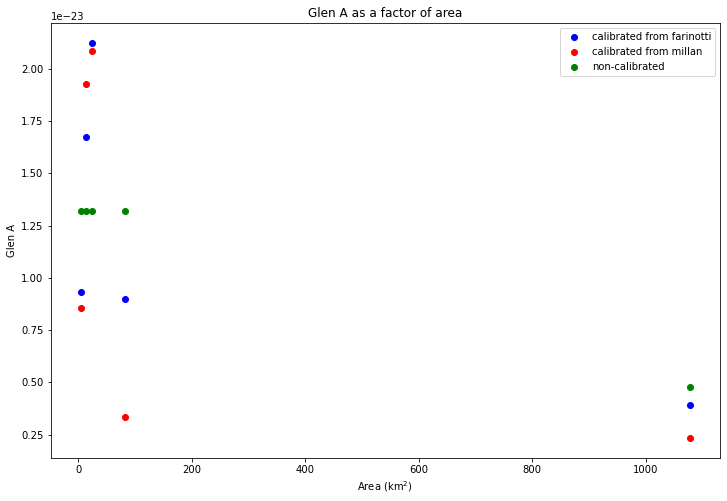

In [52]:
f, ax= plt.subplots(figsize=(12, 8))

plt.plot(x,yf,'bo',label='calibrated from farinotti')
plt.plot(x,ym,'ro',label='calibrated from millan')
plt.plot(x,yo,'go',label= 'non-calibrated')

plt.legend()          
plt.title('Glen A as a factor of area')
plt.xlabel('Area ($\mathregular{km^2}$)')
plt.ylabel('Glen A')

## Running simulations based on the calibration

In [2]:
cfg.add_to_basenames('model_geometry_my_spinup','model_geometry_my_spinup.nc')
cfg.add_to_basenames('model_geometry_with_spinup','model_geometry_with_spinup.nc')
for rcp in ['rcp26','rcp45','rcp60','rcp85']:
    cfg.add_to_basenames('model_geometry_CCSM4_'+rcp+'','model_geometry_CCSM4_'+rcp+'.nc')
    cfg.add_to_basenames('model_diagnostics_CCSM4_'+rcp+'','model_diagnostics_CCSM4_'+rcp+'.nc')

In [3]:
cfg.add_to_basenames('model_geometry_no_spinup','model_geometry_no_spinup.nc')

In [4]:
cfg.add_to_basenames('fl_diagnostics_my_spinup','fl_diagnostics_my_spinup.nc')

In [5]:
cfg.add_to_basenames('fl_diagnostics_with_spinup','fl_diagnostics_with_spinup.nc')

In [4]:
#download and process gcm data
#precipitations
bp = 'https://cluster.klima.uni-bremen.de/~oggm/cmip5-ng/pr/pr_mon_CCSM4_{}_r1i1p1_g025.nc'
#temperatures
bt = 'https://cluster.klima.uni-bremen.de/~oggm/cmip5-ng/tas/tas_mon_CCSM4_{}_r1i1p1_g025.nc'

In [5]:
import work_tasks
from oggm.core import climate, massbalance, flowline

import time
# start time !
start_time = time.time()


#Pre-allocate
out_evol={'oggm':[0]*4,'farinotti':[0]*4,'millan':[0]*4}
out_evol_no_spin = {'oggm':[0]*4,'farinotti':[0]*4,'millan':[0]*4}


out_hydro_hist = {'oggm':0,'farinotti':0,'millan':0}
out_hydro_hist_no_spin = {'oggm':0,'farinotti':0,'millan':0}

list_out_surf=[0]*3 
list_out_bed=[0]*3
list_out_surf_evol=[0]*9
list_out_bed_evol=[0]*3


d_=[0,0,0]

path_to_hdf='/home/lucillegimenes/volumes_millan.h5'

k=0
data_list=['oggm','farinotti','millan']
for data in data_list:
    print(data)
    gdirs = workflow.init_glacier_directories(rgi_ids,from_prepro_level=from_prepro_level,
                                                  prepro_border=prepro_border)
    gdir=gdirs[0]

    gdir.name_corr=gdir.name.replace('/','-')
    if (gdir.name==''):
        gdir.name_corr='Aletsch'
        
    #Little adjustment
    if (gdir.rgi_region in ['13','14','15']):
        gdir.rgi_region_m='13-15'
    else:
        gdir.rgi_region_m=gdir.rgi_region
        
    #Calibration
    if (data=='farinotti'):
        work_tasks.calibrate_inversion_from_consensus(gdir,vol_bias=1.5)
            #tasks.mass_conservation_inversion(gdir, glen_a=diag[data][1]['inversion_glen_a'], write=True)
            #tasks.filter_inversion_output(gdir)
            #workflow.execute_entity_task(tasks.init_present_time_glacier, gdir) 
    elif(data=='millan'):
        work_tasks.calibrate_inversion_from_millan(gdir,path_to_hdf,vol_bias=1.5)
            #tasks.mass_conservation_inversion(gdir, glen_a=diag[data][1]['inversion_glen_a'], write=True)
            #tasks.filter_inversion_output(gdir)
            #workflow.execute_entity_task(tasks.init_present_time_glacier, gdir)
     
        
    for sp in ['spin','no_spin']:
        
        workflow.execute_entity_task(tasks.init_present_time_glacier, gdir)
        
        if(sp=='no_spin'):
            # Run a past climate run based on this spinup
            workflow.execute_entity_task(tasks.run_with_hydro, gdir, run_task=tasks.run_from_climate_data,
                                    climate_filename='climate_historical',
                                    ys=2003, ye=2020,
                                    output_filesuffix='_with_spinup',store_monthly_hydro=True)
            with xr.open_dataset(gdir.get_filepath('model_diagnostics',filesuffix='_with_spinup')) as dhn:
                dhn = dhn.load()

            out_hydro_hist_no_spin[data]=dhn
        
        
        elif (sp=='spin'):
    
            #Run the spinup simulation - t* climate    
            workflow.execute_entity_task(tasks.run_constant_climate, gdir,nyears=200,output_filesuffix='_my_spinup') 

            utils.compile_glacier_statistics(gdir)
            d_[k] = utils.compile_run_output(gdir, input_filesuffix='_my_spinup')


            # Run a past climate run based on this spinup
            workflow.execute_entity_task(tasks.run_with_hydro, gdir, run_task=tasks.run_from_climate_data,
                                        climate_filename='climate_historical',
                                        ys=2003, ye=2020,init_model_filesuffix='_my_spinup',
                                        output_filesuffix='_with_spinup',store_monthly_hydro=True)

            with xr.open_dataset(gdir.get_filepath('model_diagnostics',filesuffix='_with_spinup')) as dh:
                dh = dh.load()

            out_hydro_hist[data]=dh
            
            #For plotting the initial profile
            fmod = flowline.FileModel(gdir.get_filepath('model_geometry_with_spinup'))
            fl = fmod.fls[-1]  # Main flowline
            i, j = fl.line.xy  # xy flowline on grid
            lons, lats = gdir.grid.ij_to_crs(i, j, crs='EPSG:4326')  # to WGS84

            df_coords = pd.DataFrame(index=fl.dis_on_line*gdir.grid.dx)
            df_coords.index.name = 'Distance along flowline'
            df_coords['lon'] = lons
            df_coords['lat'] = lats
            df_coords['bed_elevation'] = fl.bed_h

            df_thick = pd.DataFrame(index=df_coords.index)
            df_surf_h = pd.DataFrame(index=df_coords.index)
            df_bed_h = pd.DataFrame()

            for year in range(2003, 2005):
                fmod.run_until(year)
                fl = fmod.fls[-1]
                df_thick[year] = fl.thick
                df_surf_h[year] = fl.surface_h

            list_out_surf[k]= df_surf_h[[2003]]
            list_out_bed[k]=df_coords['bed_elevation']

        for rcp in ['rcp26', 'rcp45', 'rcp60', 'rcp85']:
            # read the path to the files, not opening with xr.opendataset()
            ft = utils.file_downloader(bt.format(rcp))
            fp = utils.file_downloader(bp.format(rcp))

            # bias correct them
            workflow.execute_entity_task(gcm_climate.process_cmip_data, gdir, filesuffix='_CCSM4_{}'.format(rcp),             # recognize the climate file for later
                                             fpath_temp=ft,                                  # temperature projections
                                             fpath_precip=fp,                                # precip projections
                                             );  


        #projection run (starting from the end year of the historical run)
        for rcp in ['rcp26', 'rcp45', 'rcp60', 'rcp85']:
            rid = '_CCSM4_{}'.format(rcp)
            # with hydro                                
            workflow.execute_entity_task(tasks.run_with_hydro, gdir, ys=2020,run_task=tasks.run_from_climate_data,
                                             climate_filename='gcm_data',                    # use gcm_data, not climate_historical
                                             climate_input_filesuffix=rid,                   # use the chosen scenario
                                             init_model_filesuffix='_with_spinup',             # this is important! Start from 2020 glacier
                                             output_filesuffix=rid,                          # recognize the run for later
                                             store_monthly_hydro=True,
                                            );

            # end of the run                                  
        print('Simulation finished sucessfully')
        
        if (sp=='spin'):
            #For plotting the evolution of the profile
            fmod2 = flowline.FileModel(gdir.get_filepath('model_geometry_CCSM4_rcp45'))
            fl2 = fmod2.fls[-1]  # Main flowline
            i2, j2 = fl2.line.xy  # xy flowline on grid
            lons2, lats2 = gdir.grid.ij_to_crs(i2, j2, crs='EPSG:4326')  # to WGS84


            df_coords2 = pd.DataFrame(index=fl2.dis_on_line*gdir.grid.dx)
            df_coords2.index.name = 'Distance along flowline'
            df_coords2['lon'] = lons2
            df_coords2['lat'] = lats2
            df_coords2['bed_elevation'] = fl2.bed_h

            df_thick2 = pd.DataFrame(index=df_coords2.index)
            df_surf_h2 = pd.DataFrame(index=df_coords2.index)
            df_bed_h2 = pd.DataFrame()

            for year in range(2020, 2101):
                fmod2.run_until(year)
                fl2 = fmod2.fls[-1]
                df_thick2[year] = fl2.thick
                df_surf_h2[year] = fl2.surface_h

            list_out_surf_evol[k]= [df_surf_h2[[2020]],df_surf_h2[[2030]], df_surf_h2[[2040]],df_surf_h2[[2050]],
                                    df_surf_h2[[2060]],df_surf_h2[[2070]],df_surf_h2[[2080]],df_surf_h2[[2090]]]
            list_out_bed_evol[k]=df_coords2['bed_elevation']


        r=0
        for rcp in ['rcp26', 'rcp45', 'rcp60', 'rcp85']:
            rid = '_CCSM4_{}'.format(rcp)

            dsf = utils.compile_run_output(gdir, input_filesuffix=rid) 
            #for later plotting use
            if (sp=='spin'):
                out_evol[data][r]=dsf
            elif(sp=='no_spin'):
                out_evol_no_spin[data][r]=dsf

            r+=1
    k+=1
    
print('Duration is')
print("--- %s seconds ---" % (time.time() - start_time)) 

oggm


2021-11-15 18:29:15: oggm.workflow: init_glacier_directories from prepro level 3 on 1 glaciers.
2021-11-15 18:29:15: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers
2021-11-15 18:29:15: oggm.workflow: Execute entity tasks [init_present_time_glacier] on 1 glaciers
2021-11-15 18:29:15: oggm.workflow: Execute entity tasks [run_constant_climate] on 1 glaciers
2021-11-15 18:29:55: oggm.utils: Applying global task compile_glacier_statistics on 1 glaciers
2021-11-15 18:29:55: oggm.workflow: Execute entity tasks [glacier_statistics] on 1 glaciers
2021-11-15 18:29:55: oggm.utils: Applying global task compile_run_output on 1 glaciers
2021-11-15 18:29:55: oggm.utils: Applying compile_run_output on 1 gdirs.
2021-11-15 18:29:55: oggm.workflow: Execute entity tasks [run_with_hydro] on 1 glaciers
2021-11-15 18:29:59: oggm.workflow: Execute entity tasks [process_cmip_data] on 1 glaciers
2021-11-15 18:30:00: oggm.workflow: Execute entity tasks [process_cmip_data] on 1 glaciers
2021

Simulation finished sucessfully


2021-11-15 18:30:35: oggm.utils: Applying global task compile_run_output on 1 glaciers
2021-11-15 18:30:35: oggm.utils: Applying compile_run_output on 1 gdirs.
2021-11-15 18:30:35: oggm.utils: Applying global task compile_run_output on 1 glaciers
2021-11-15 18:30:35: oggm.utils: Applying compile_run_output on 1 gdirs.
2021-11-15 18:30:36: oggm.utils: Applying global task compile_run_output on 1 glaciers
2021-11-15 18:30:36: oggm.utils: Applying compile_run_output on 1 gdirs.
2021-11-15 18:30:36: oggm.utils: Applying global task compile_run_output on 1 glaciers
2021-11-15 18:30:36: oggm.utils: Applying compile_run_output on 1 gdirs.
2021-11-15 18:30:36: oggm.workflow: Execute entity tasks [init_present_time_glacier] on 1 glaciers
2021-11-15 18:30:36: oggm.workflow: Execute entity tasks [run_with_hydro] on 1 glaciers
2021-11-15 18:30:36: oggm.core.flowline: You are attempting to run_with_climate_data at dates prior to the RGI inventory date. This may indicate some problem in your workflo

Simulation finished sucessfully


2021-11-15 18:31:17: oggm.utils: Applying global task compile_run_output on 1 glaciers
2021-11-15 18:31:17: oggm.utils: Applying compile_run_output on 1 gdirs.
2021-11-15 18:31:17: oggm.utils: Applying global task compile_run_output on 1 glaciers
2021-11-15 18:31:17: oggm.utils: Applying compile_run_output on 1 gdirs.


farinotti


2021-11-15 18:31:18: oggm.workflow: init_glacier_directories from prepro level 3 on 1 glaciers.
2021-11-15 18:31:18: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers
2021-11-15 18:31:18: work_tasks: Consensus estimate optimisation with A factor: 0.1 and fs: 0
2021-11-15 18:31:18: oggm.workflow: Applying global task inversion_tasks on 1 glaciers
2021-11-15 18:31:18: oggm.workflow: Execute entity tasks [prepare_for_inversion] on 1 glaciers
2021-11-15 18:31:18: oggm.workflow: Execute entity tasks [mass_conservation_inversion] on 1 glaciers
2021-11-15 18:31:18: oggm.workflow: Execute entity tasks [filter_inversion_output] on 1 glaciers
2021-11-15 18:31:18: oggm.workflow: Execute entity tasks [get_inversion_volume] on 1 glaciers
2021-11-15 18:31:18: work_tasks: Consensus estimate optimisation with A factor: 10.0 and fs: 0
2021-11-15 18:31:18: oggm.workflow: Applying global task inversion_tasks on 1 glaciers
2021-11-15 18:31:18: oggm.workflow: Execute entity tasks [prepar

Simulation finished sucessfully


2021-11-15 18:32:19: oggm.utils: Applying global task compile_run_output on 1 glaciers
2021-11-15 18:32:19: oggm.utils: Applying compile_run_output on 1 gdirs.
2021-11-15 18:32:19: oggm.utils: Applying global task compile_run_output on 1 glaciers
2021-11-15 18:32:19: oggm.utils: Applying compile_run_output on 1 gdirs.
2021-11-15 18:32:19: oggm.utils: Applying global task compile_run_output on 1 glaciers
2021-11-15 18:32:19: oggm.utils: Applying compile_run_output on 1 gdirs.
2021-11-15 18:32:19: oggm.utils: Applying global task compile_run_output on 1 glaciers
2021-11-15 18:32:19: oggm.utils: Applying compile_run_output on 1 gdirs.
2021-11-15 18:32:19: oggm.workflow: Execute entity tasks [init_present_time_glacier] on 1 glaciers
2021-11-15 18:32:19: oggm.workflow: Execute entity tasks [run_with_hydro] on 1 glaciers
2021-11-15 18:32:19: oggm.core.flowline: You are attempting to run_with_climate_data at dates prior to the RGI inventory date. This may indicate some problem in your workflo

Simulation finished sucessfully


2021-11-15 18:32:53: oggm.utils: Applying global task compile_run_output on 1 glaciers
2021-11-15 18:32:53: oggm.utils: Applying compile_run_output on 1 gdirs.
2021-11-15 18:32:53: oggm.utils: Applying global task compile_run_output on 1 glaciers
2021-11-15 18:32:53: oggm.utils: Applying compile_run_output on 1 gdirs.


millan


2021-11-15 18:32:55: oggm.workflow: init_glacier_directories from prepro level 3 on 1 glaciers.
2021-11-15 18:32:55: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers
2021-11-15 18:32:55: work_tasks: Consensus estimate optimisation with A factor: 0.1 and fs: 0
2021-11-15 18:32:55: oggm.workflow: Applying global task inversion_tasks on 1 glaciers
2021-11-15 18:32:55: oggm.workflow: Execute entity tasks [prepare_for_inversion] on 1 glaciers
2021-11-15 18:32:55: oggm.workflow: Execute entity tasks [mass_conservation_inversion] on 1 glaciers
2021-11-15 18:32:55: oggm.workflow: Execute entity tasks [filter_inversion_output] on 1 glaciers
2021-11-15 18:32:55: oggm.workflow: Execute entity tasks [get_inversion_volume] on 1 glaciers
2021-11-15 18:32:55: work_tasks: Consensus estimate optimisation with A factor: 10.0 and fs: 0
2021-11-15 18:32:55: oggm.workflow: Applying global task inversion_tasks on 1 glaciers
2021-11-15 18:32:55: oggm.workflow: Execute entity tasks [prepar

Simulation finished sucessfully


2021-11-15 18:33:50: oggm.utils: Applying global task compile_run_output on 1 glaciers
2021-11-15 18:33:50: oggm.utils: Applying compile_run_output on 1 gdirs.
2021-11-15 18:33:50: oggm.utils: Applying global task compile_run_output on 1 glaciers
2021-11-15 18:33:50: oggm.utils: Applying compile_run_output on 1 gdirs.
2021-11-15 18:33:50: oggm.utils: Applying global task compile_run_output on 1 glaciers
2021-11-15 18:33:50: oggm.utils: Applying compile_run_output on 1 gdirs.
2021-11-15 18:33:50: oggm.utils: Applying global task compile_run_output on 1 glaciers
2021-11-15 18:33:50: oggm.utils: Applying compile_run_output on 1 gdirs.
2021-11-15 18:33:50: oggm.workflow: Execute entity tasks [init_present_time_glacier] on 1 glaciers
2021-11-15 18:33:50: oggm.workflow: Execute entity tasks [run_with_hydro] on 1 glaciers
2021-11-15 18:33:50: oggm.core.flowline: You are attempting to run_with_climate_data at dates prior to the RGI inventory date. This may indicate some problem in your workflo

Simulation finished sucessfully


2021-11-15 18:34:21: oggm.utils: Applying global task compile_run_output on 1 glaciers
2021-11-15 18:34:21: oggm.utils: Applying compile_run_output on 1 gdirs.


Duration is
--- 307.2007403373718 seconds ---


# Figures

## Influence of the spin up

If the glen parameter A is well adjusted, the spin up shouldn't change much the initial volume

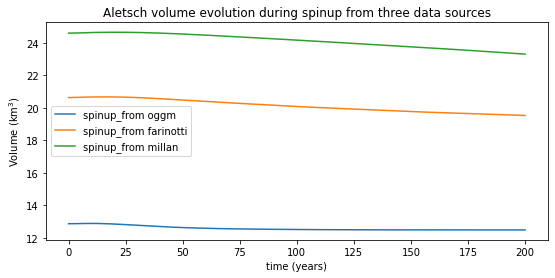

In [24]:
f, ax = plt.subplots(figsize=(9, 4))
for k in range(0,3):
    (d_[k].volume.sum(dim='rgi_id') * 1e-9).plot(ax=ax, label='spinup_from '+data_list[k])

plt.legend()
plt.title(''+gdir.name_corr+' volume evolution during spinup from three data sources')
plt.xlabel('time (years)')
plt.ylabel('Volume ($\mathregular{km^3}$)')
name = ''+gdir.name_corr+'_volume_spinup.png'
#plt.savefig(name, format = 'png')

In [275]:
((d_[0].volume.sum(dim='rgi_id')[0]-d_[0].volume.sum(dim='rgi_id')[200])/d_[0].volume.sum(dim='rgi_id')[0])*100

<xarray.DataArray 'volume' ()>
array(0.34522594)
Coordinates:
    hydro_month     int64 1
    calendar_month  int64 10
    time            float64 0.0
    hydro_year      int64 0
    calendar_year   int64 -1

## Influence of the spin up on projected volume evolution

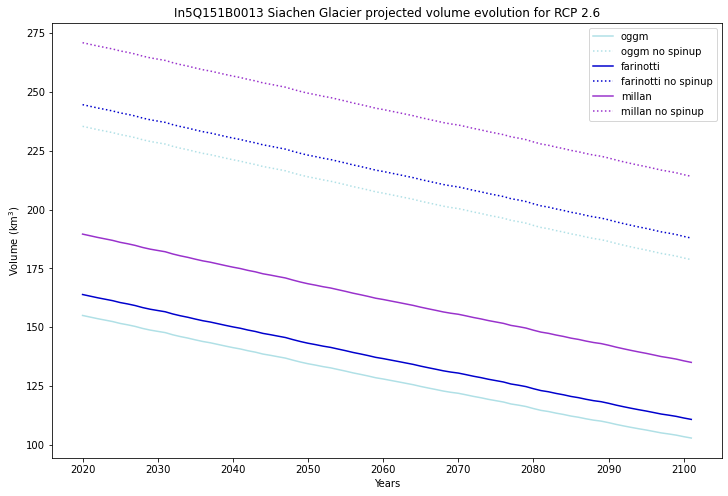

In [11]:
f, ax= plt.subplots(figsize=(12, 8))
rcp=['rcp26','rcp45','rcp60','rcp85']

for data in data_list:
    if (data=='farinotti'):
        color_s="mediumblue"
    elif(data=='millan'):
        color_s="darkorchid"
    else:
        color_s="powderblue"
            
    (out_evol[data][0].volume*10**-9).plot(ax=ax,label=''+data+'', linestyle='-',color=color_s)
         
    (out_evol_no_spin[data][0].volume*10**-9).plot(ax=ax,label=''+data+' no spinup', linestyle=":",color=color_s)

                    
plt.legend()          
plt.title(''+gdir.name_corr+' projected volume evolution for RCP 2.6')
plt.xlabel('Years')
plt.ylabel('Volume ($\mathregular{km^3}$)')
name = ''+gdir.name_corr+'_evol_volume_no-w_spi .png'
plt.savefig(name, format = 'png')

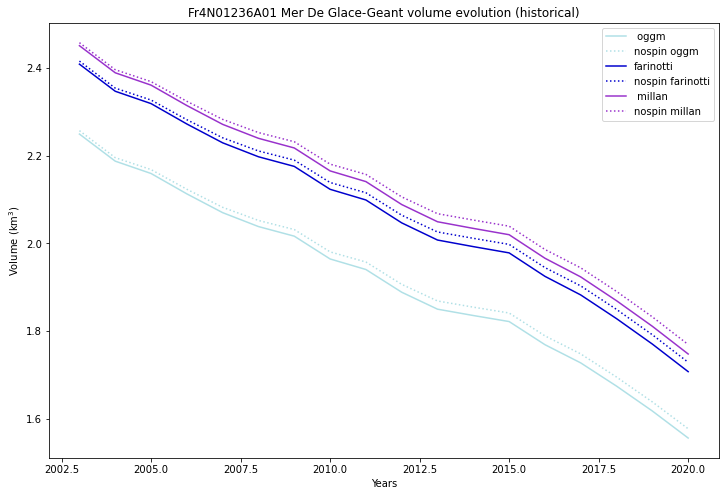

In [278]:
f, ax= plt.subplots(figsize=(12, 8))

for data in data_list:
        if (data=='farinotti'):
            (out_hydro_hist[data].volume_m3*10**-9).plot(ax=ax,label=''+data, linestyle="-",color="mediumblue")
            (out_hydro_hist_no_spin[data].volume_m3*10**-9).plot(ax=ax,label='nospin '+data, linestyle=":",color="mediumblue")
        elif (data=='millan'):
            (out_hydro_hist[data].volume_m3*10**-9).plot(ax=ax,label=' '+data, linestyle="-",color="darkorchid")
            (out_hydro_hist_no_spin[data].volume_m3*10**-9).plot(ax=ax,label='nospin '+data, linestyle=":",color="darkorchid")

        elif(data=='oggm'):

            (out_hydro_hist[data].volume_m3*10**-9).plot(ax=ax,label=' '+data, linestyle="-",color="powderblue")
            (out_hydro_hist_no_spin[data].volume_m3*10**-9).plot(ax=ax,label='nospin '+data, linestyle=":",color="powderblue")

                    
plt.legend()          
plt.title(''+gdir.name_corr+' volume evolution (historical)')
plt.xlabel('Years')
plt.ylabel('Volume ($\mathregular{km^3}$)')
name = ''+gdir.name_corr+'_evol_volume_spinup_histo.png'
plt.savefig(name, format = 'png')

## Projected volume evolution for different RCP scenarios

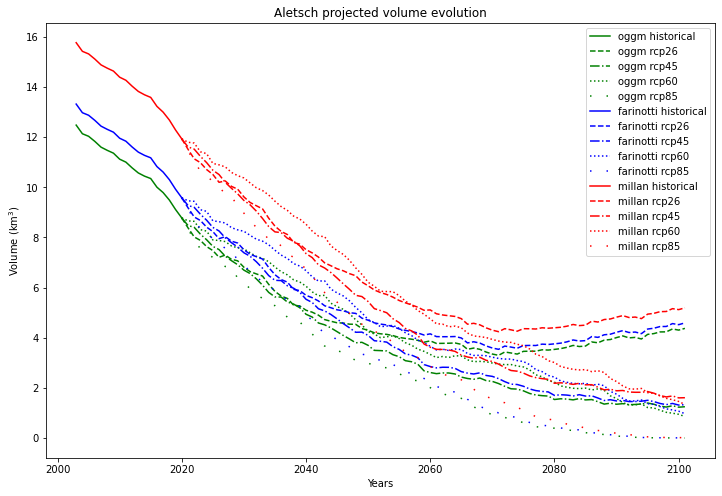

In [12]:
f, ax= plt.subplots(figsize=(12, 8))
rcp=['rcp26','rcp45','rcp60','rcp85']


for data in data_list:
    if (data=='farinotti'):
        color_s="b"
    elif(data=='millan'):
        color_s="r"
    else:
        color_s="g"

    (out_hydro_hist[data].volume_m3*10**-9).plot(ax=ax,label=''+data+' historical', linestyle='-',color=color_s)
    for k in range(0,4):
        if (k==0):
            st='dashed'
        elif (k==1):
            st='-.'
        elif (k==2):
            st=':'
        else:
            st=(0, (1, 10))
            
        (out_evol[data][k].volume*10**-9).plot(ax=ax,label=''+data+' '+rcp[k]+'', linestyle=st,color=color_s)

                    
plt.legend()          
plt.title(''+gdir.name_corr+' projected volume evolution')
plt.xlabel('Years')
plt.ylabel('Volume ($\mathregular{km^3}$)')
name = ''+gdir.name_corr+'_evol_volume_opt1.png'
plt.savefig(name, format = 'png')

### In %

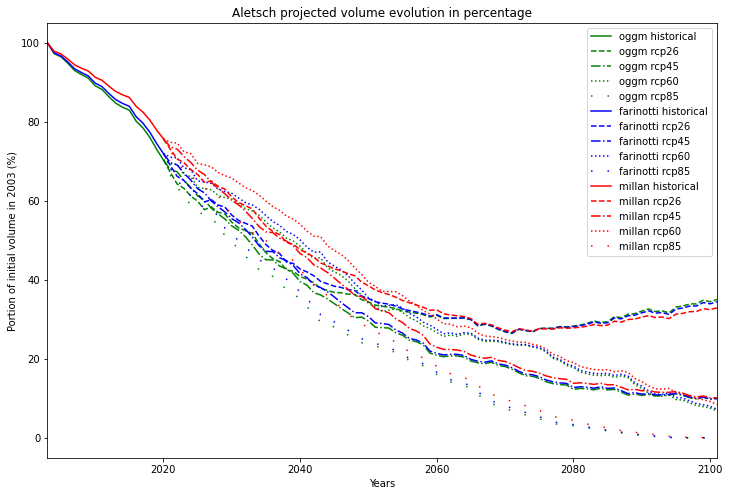

In [13]:
f, ax= plt.subplots(figsize=(12, 8))
rcp=['rcp26','rcp45','rcp60','rcp85']


for data in data_list:
    if (data=='farinotti'):
        color_s="b"
    elif(data=='millan'):
        color_s="r"
    else:
        color_s="g"
    
    start_v=np.float64(out_hydro_hist[data].volume_m3.sel(time=[2003]))
    ((out_hydro_hist[data].volume_m3/start_v)*100).plot(ax=ax,label=''+data+' historical', linestyle='-',color=color_s)
    for k in range(0,4):
        if (k==0):
            st='dashed'
        elif (k==1):
            st='-.'
        elif (k==2):
            st=':'
        else:
            st=(0, (1, 10))
            
        ((out_evol[data][k].volume/start_v)*100).plot(ax=ax,label=''+data+' '+rcp[k]+'', linestyle=st,color=color_s)

                    
plt.legend()          
plt.title(''+gdir.name_corr+' projected volume evolution in percentage')
plt.xlabel('Years')
plt.ylabel('Portion of initial volume in 2003 (%)')
plt.xlim(2003,2101)
name = ''+gdir.name_corr+'_volume_all_perc.png'
plt.savefig(name, format = 'png')

### Rate of annual loss

In [14]:
out_hydro_hist[data].volume_m3*10**-9
rate={'farinotti':[0]*17,'millan':[0]*17,'oggm':[0]*17}
rate_rcp={'farinotti':[[0]*80,[0]*80,[0]*80,[0]*80],'millan':[[0]*80,[0]*80,[0]*80,[0]*80],
          'oggm':[[0]*80,[0]*80,[0]*80,[0]*80]}
for data in data_list:
    for t in range(2003,2020):
        rate[data][t-2003]=(np.float64(out_hydro_hist[data].volume_m3.sel(time=[t]))-np.float64(out_hydro_hist[data].volume_m3.sel(time=[t+1])))*10**-9
    for k in range(0,4):
        for t in range(2020,2100):
             rate_rcp[data][k][t-2020]=(np.float64(out_evol[data][k].volume.sel(time=[t]))-np.float64(out_evol[data][k].volume.sel(time=[t+1])))*10**-9

In [15]:
rate_all={'farinotti':0,'millan':0,'oggm':0}
for data in data_list:
    rate_all[data]=rate[data]+rate_rcp[data]

In [16]:
t_r=np.linspace(2003,2099,97)

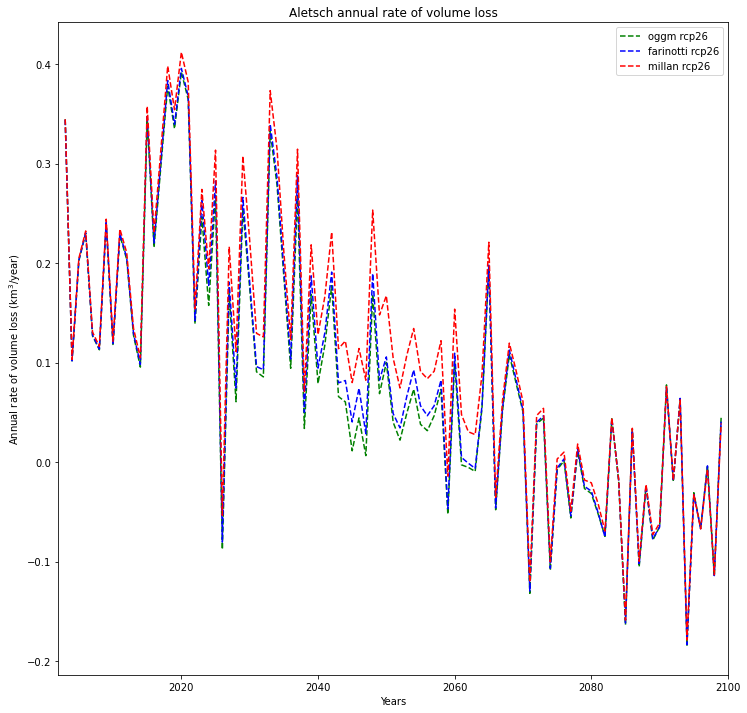

In [17]:
f, ax= plt.subplots(figsize=(12, 12))
rcp=['rcp26','rcp45','rcp60','rcp85']

for data in data_list:
    if (data=='farinotti'):
        color_s="b"
    elif(data=='millan'):
        color_s="r"
    else:
        color_s="g"
    
    for k in range(0,4,4):
        if (k==0):
            st='dashed'
        elif (k==1):
            st='-.'
        elif (k==2):
            st=':'
        else:
            st=(0, (1, 10))
        new_rate=rate_all[data][0:17]+rate_all[data][17+k]
        plt.plot(t_r,new_rate,label=''+data+' '+rcp[k]+'', linestyle=st,color=color_s)

                    
plt.legend() 
plt.xlim(2002,2100)
plt.title(''+gdir.name_corr+' annual rate of volume loss')
plt.xlabel('Years')
plt.ylabel('Annual rate of volume loss ($\mathregular{km^3}$/year)')
name = ''+gdir.name_corr+'_rate_vol_lostt.png'
plt.savefig(name, format = 'png')

## Projected area evolution for several RCP scenarios

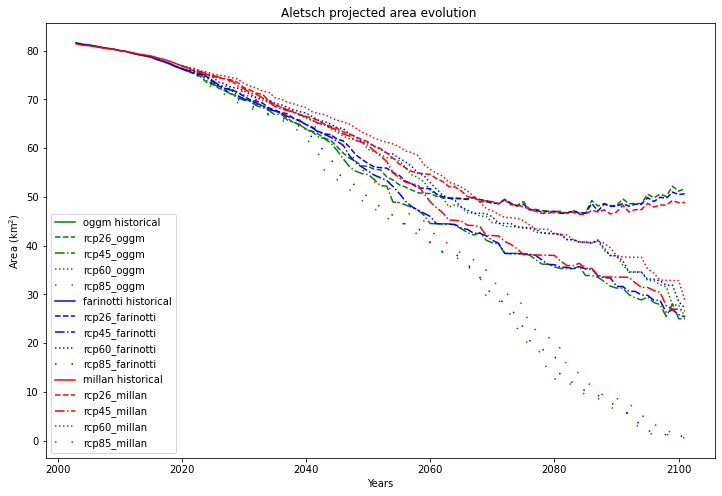

In [19]:
f, ax= plt.subplots(figsize=(12, 8))
rcp=['rcp26','rcp45','rcp60','rcp85']


for data in data_list:
    if (data=='farinotti'):
        color_s="b"
    elif(data=='millan'):
        color_s="r"
    else:
        color_s="g"
        
    (out_hydro_hist[data].area_m2*10**-6).plot(ax=ax,label=''+data+' historical', linestyle='-',color=color_s)
    for k in range(0,4):
        if (k==0):
            st='dashed'
        elif (k==1):
            st='-.'
        elif (k==2):
            st=':'
        else:
            st=(0, (1, 10))
            
        (out_evol[data][k].area*10**-6).plot(ax=ax,label=''+rcp[k]+'_'+data, linestyle=st,color=color_s)
        

plt.legend()          
plt.title(''+gdir.name_corr+' projected area evolution ')
plt.xlabel('Years')
plt.ylabel('Area ($\mathregular{km^2}$)')
name = ''+gdir.name_corr+'_evol_area_all.png'
plt.savefig(name, format = 'png')

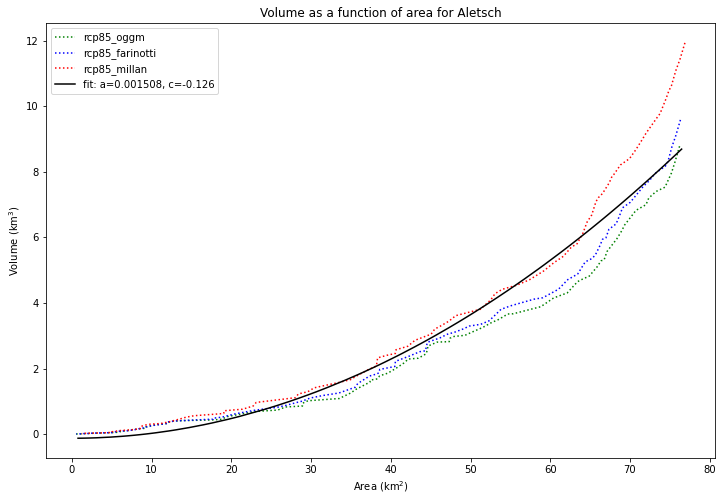

In [20]:
f, ax= plt.subplots(figsize=(12, 8))
rcp=['rcp26','rcp45','rcp60','rcp85']
from scipy.optimize import curve_fit


def func(x, a, c):

    return a * x**2 + c

x_data=[]
y_data=[]
for data in data_list:
    if (data=='farinotti'):
        plt.plot(out_evol[data][3].area*10**-6,out_evol[data][3].volume*10**-9,label=''+rcp[3]+'_'+data, linestyle=":",color="b")
    elif (data=='millan'):
        plt.plot(out_evol[data][3].area*10**-6,out_evol[data][3].volume*10**-9,label=''+rcp[3]+'_'+data, linestyle=":",color="r")
    else:
        plt.plot(out_evol[data][3].area*10**-6,out_evol[data][3].volume*10**-9,label=''+rcp[3]+'_'+data, linestyle=":",color="g")

    x_data.append(out_evol[data][3].sum(dim='rgi_id').area*10**-6)
    y_data.append(out_evol[data][3].sum(dim='rgi_id').volume*10**-9)
    
x_data=(x_data[0]+x_data[1]+x_data[2])/3
y_data=(y_data[0]+y_data[1]+y_data[2])/3

popt, pcov = curve_fit(func, x_data, y_data)
plt.plot(x_data,func(x_data,*popt),c="k",label='fit: a=%5.6f, c=%5.3f' % tuple(popt))


plt.xlabel('Area ($\mathregular{km^2}$)')
plt.ylabel('Volume ($\mathregular{km^3}$)')
plt.legend()          
plt.title('Volume as a function of area for '+gdir.name_corr+'')
name = ''+gdir.name_corr+'_evol_ratio_opt1.png'
plt.savefig(name, format = 'png')

## Projected area evolution for several RCP scenarios

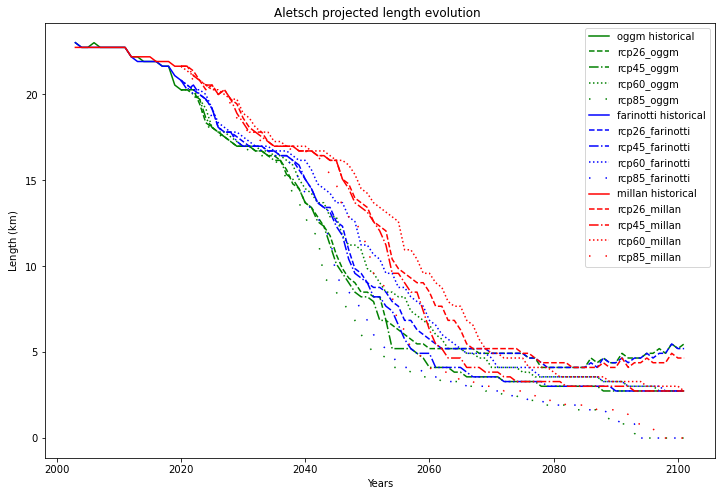

In [21]:
f, ax= plt.subplots(figsize=(12, 8))
rcp=['rcp26','rcp45','rcp60','rcp85']


for data in data_list:
    if (data=='farinotti'):
        color_s="b"
    elif(data=='millan'):
        color_s="r"
    else:
        color_s="g"
        
    (out_hydro_hist[data].length_m*10**-3).plot(ax=ax,label=''+data+' historical', linestyle='-',color=color_s)
    for k in range(0,4):
        if (k==0):
            st='dashed'
        elif (k==1):
            st='-.'
        elif (k==2):
            st=':'
        else:
            st=(0, (1, 10))
            
        (out_evol[data][k].length*10**-3).plot(ax=ax,label=''+rcp[k]+'_'+data, linestyle=st,color=color_s)
        

plt.legend()          
plt.title(''+gdir.name_corr+' projected length evolution ')
plt.xlabel('Years')
plt.ylabel('Length ($\mathregular{km}$)')
name = ''+gdir.name_corr+'_evol_length_all.png'
plt.savefig(name, format = 'png')


## Annual runoff and peak water 

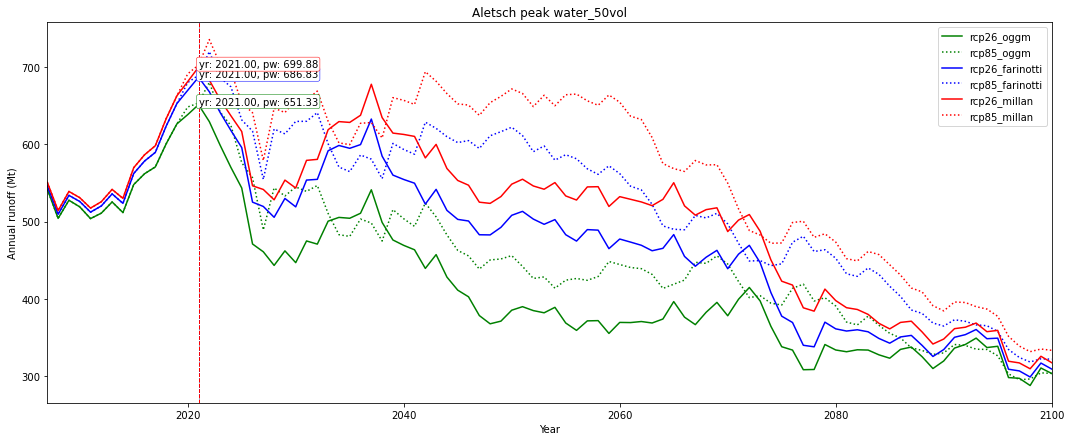

In [9]:
f, ax = plt.subplots(figsize=(18, 7))
rcp=['rcp26','rcp45','rcp60','rcp85']

                
for data in data_list: #loop all data sources
    
    for k in range(0,4,3): #loop all scenarios

        # Select annual variables
        d_p=out_evol[data][k]
        d_h=out_hydro_hist[data]

        sel_vars = [v for v in d_p.variables if 'month_2d' not in d_p[v].dims]
        sel_vars_hist = [v for v in d_h.variables if 'month_2d' not in d_h[v].dims]
        
        # And create a dataframe
        dp_annual = d_p[sel_vars].to_dataframe()
        dh_annual = d_h[sel_vars_hist].to_dataframe()

        # Select the variables relevant for runoff.
        runoff_vars = ['melt_off_glacier', 'melt_on_glacier','liq_prcp_off_glacier', 'liq_prcp_on_glacier']
        
        dp_runoff = dp_annual[runoff_vars].clip(0) * 1e-9
        dp_runoff = dp_runoff.droplevel('rgi_id')  
        dp_runoff = dp_runoff.drop([2101],axis=0)
        
        dh_runoff = dh_annual[runoff_vars].clip(0) * 1e-9
        dh_runoff = dh_runoff.drop([2020],axis=0)
        
        
        dpt_runoff=pd.concat([dh_runoff,dp_runoff], axis=0)
        
        # Sum the variables each year "axis=1", take the 11 year rolling mean
        # and plot it.
        year_pw=int(dpt_runoff.sum(axis=1).rolling(window=5).mean().idxmax())
        max_pw=dpt_runoff.sum(axis=1).rolling(window=5).mean().max()
        
        #Plotting styles
        if (data=='farinotti'):
            color_s='b'
        elif(data=='millan'):
            color_s='r'
        else:
            color_s='g'
        if (k==0):
            st='-'
        elif(k==3):
            st=':'
        
        dpt_runoff.sum(axis=1).rolling(window=5).mean().plot(ax=ax, label=''+rcp[k]+'_'+data, linestyle=st,color=color_s)
        if (k==0):
            plt.axvline(year_pw, color=color_s, linestyle='dashed', linewidth=1)
            plt.text(year_pw, max_pw, 'yr: {:.2f}, '.format(year_pw)+'pw: {:.2f}'.format(max_pw),bbox=dict(boxstyle="round,pad=0.2", fc="white", ec=color_s, lw=0.5))

plt.xlim(2007,2100)
ax.set_ylabel('Annual runoff (Mt)')
ax.set_xlabel('Year')
plt.title(''+gdir.name_corr+' peak water_50vol')
plt.legend();
name = ''+gdir.name_corr+'_peak_water'    
plt.savefig(name, format = 'png')

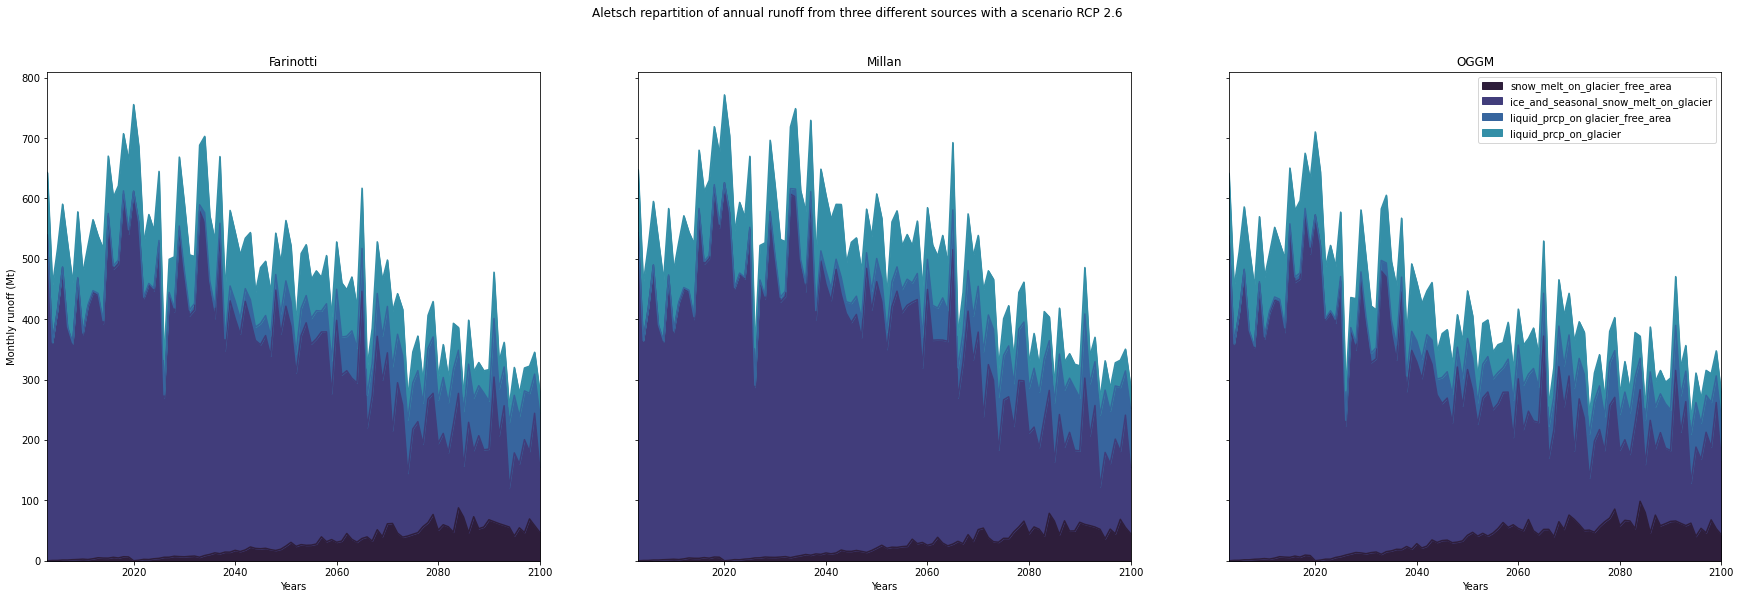

In [26]:
import seaborn as sns
f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(30, 9),sharey=True)

for data in data_list: #loop all data sources
    d_p=out_evol[data][0]
    d_ptot=d_p
        
    d_h=out_hydro_hist[data]
    d_htot = d_h

    sel_vars = [v for v in d_ptot.variables if 'month_2d' not in d_ptot[v].dims]
    sel_vars_hist = [v for v in d_htot.variables if 'month_2d' not in d_htot[v].dims]
        
    # And create a dataframe
    dp_annual = d_ptot[sel_vars].to_dataframe()
    dh_annual = d_htot[sel_vars_hist].to_dataframe()

    # Select the variables relevant for runoff.
    runoff_vars = ['melt_off_glacier', 'melt_on_glacier','liq_prcp_off_glacier', 'liq_prcp_on_glacier']
        
    dp_runoff = dp_annual[runoff_vars].clip(0) * 1e-9
    dp_runoff = dp_runoff.droplevel('rgi_id') 
    dp_runoff = dp_runoff.drop([2101],axis=0)
        
    dh_runoff = dh_annual[runoff_vars].clip(0) * 1e-9
    dh_runoff = dh_runoff.drop([2020],axis=0)
        
    dp_runoff=pd.concat([dh_runoff,dp_runoff], axis=0) #historical and projections in the same Dataframe
    dp_runoff=dp_runoff.rename(columns={ "melt_off_glacier":"snow_melt_on_glacier_free_area",
                              "melt_on_glacier":"ice_and_seasonal_snow_melt_on_glacier",
                              "liq_prcp_off_glacier":"liquid_prcp_on glacier_free_area",
                              "liq_prcp_on_glacier":"liquid_prcp_on_glacier"})
    
    if (data=='farinotti'):
        dp_runoff.plot.area(ax=ax1, legend=False, title='Farinotti', color=sns.color_palette("mako"));
    elif(data=='millan'):
        dp_runoff.plot.area(ax=ax2, legend=False, title='Millan', color=sns.color_palette("mako")); 
    else:
        dp_runoff.plot.area(ax=ax3, title='OGGM', color=sns.color_palette("mako"));

plt.suptitle(''+gdir.name_corr+' repartition of annual runoff from three different sources with a scenario RCP 2.6')
ax1.set_ylabel('Monthly runoff (Mt)'); ax2.set_ylabel('Monthly runoff (Mt)'); ax3.set_ylabel('Monthly runoff (Mt)')
ax1.set_xlabel('Years'); ax2.set_xlabel('Years'); ax3.set_xlabel('Years')
ax1.set_xlim(2003,2100);ax2.set_xlim(2003,2100);ax3.set_xlim(2003,2100)
ax2.set_axis_on()
a=ax1.get_ybound()[1]
b=ax2.get_ybound()[1]
c=ax3.get_ybound()[1]
mm=max(a,b,c)
ax1.set_ylim(bottom=0,top=mm);ax2.set_ylim(bottom=0,top=mm);ax3.set_ylim(bottom=0,top=mm)

name = ''+gdir.name_corr+'_distrib_runoff__26_opt1_50vol.png'
plt.savefig(name, format = 'png')

## Plotting profiles

### Initial profil

In [23]:
df_surf=pd.concat([list_out_surf[1],list_out_surf[2],list_out_surf[0]], axis=1)
df_bed=pd.concat([list_out_bed[1],list_out_bed[2],list_out_bed[0]], axis=1)
df_surf.columns=['farinotti','millan','oggm']
df_bed.columns=['bed farinotti','bed millan','bed oggm']

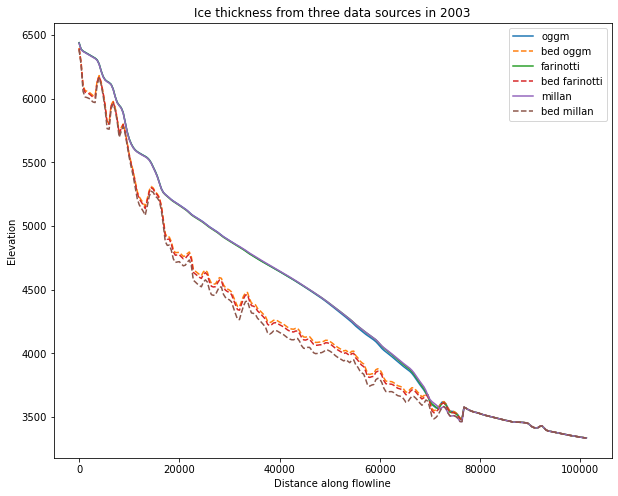

In [24]:
f, ax = plt.subplots(figsize=(10, 8))
for data in data_list:
    df_surf[[data]].plot(ax=ax);
    plt.legend()
    df_bed[['bed '+data+'']].plot(ax=ax,ylabel='Elevation',style="--");
    plt.legend()
plt.title('Ice thickness from three data sources in 2003');
name = ''+gdir.name_corr+'_profil_init_opt1.png'
plt.savefig(name, format = 'png')


### Profile in time for the three data sources

In [25]:
df_surf_farinotti=pd.concat([list_out_surf_evol[1][0],list_out_surf_evol[1][1],list_out_surf_evol[1][2],
                             list_out_surf_evol[1][3],list_out_surf_evol[1][4],list_out_surf_evol[1][5],
                             list_out_surf_evol[1][6],list_out_surf_evol[1][7]],axis=1)
df_surf_millan=pd.concat([list_out_surf_evol[2][0],list_out_surf_evol[2][1],list_out_surf_evol[2][2],
                          list_out_surf_evol[2][3],list_out_surf_evol[2][4],list_out_surf_evol[2][5],
                          list_out_surf_evol[2][6],list_out_surf_evol[2][7]], axis=1)
df_surf_oggm=pd.concat([list_out_surf_evol[0][0],list_out_surf_evol[0][1],list_out_surf_evol[0][2],
                        list_out_surf_evol[0][3],list_out_surf_evol[0][4],list_out_surf_evol[0][5],
                        list_out_surf_evol[0][6],list_out_surf_evol[0][7]], axis=1)

In [26]:
df_bed_2=pd.concat([list_out_bed_evol[1],list_out_bed_evol[2],list_out_bed_evol[0]], axis=1)

In [27]:
df_bed_2.columns=['bed farinotti','bed millan','bed oggm']

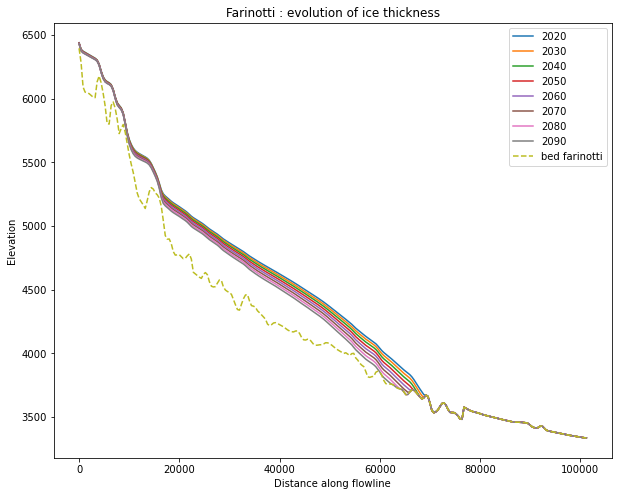

In [28]:
f, ax = plt.subplots(figsize=(10, 8))
for year in [2020,2030,2040,2050,2060,2070,2080,2090]:
    df_surf_farinotti[[year]].plot(ax=ax);
    plt.legend()
df_bed_2[['bed farinotti']].plot(ax=ax,ylabel='Elevation',style="--");
plt.legend()
plt.title('Farinotti : evolution of ice thickness');
name = ''+gdir.name_corr+'_profil_evol_f.png'
plt.savefig(name, format = 'png')

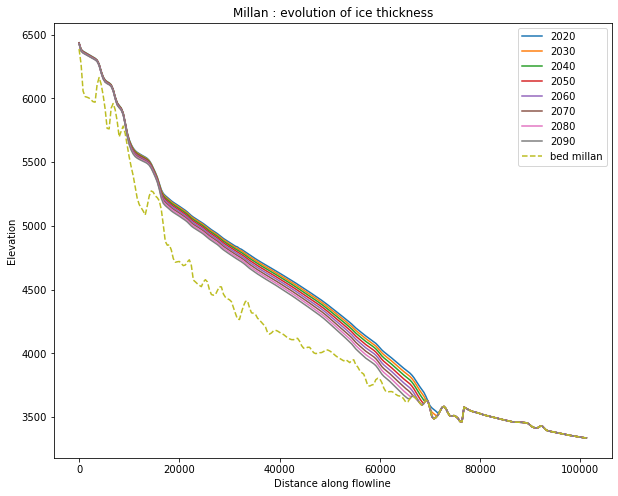

In [29]:
f, ax = plt.subplots(figsize=(10, 8))
for year in [2020,2030,2040,2050,2060,2070,2080,2090]:
    df_surf_millan[[year]].plot(ax=ax);
    plt.legend()
df_bed_2[['bed millan']].plot(ax=ax,ylabel='Elevation',style="--");
plt.legend()
plt.title('Millan : evolution of ice thickness');
name = ''+gdir.name_corr+'_profil_evol_m.png'
plt.savefig(name, format = 'png')

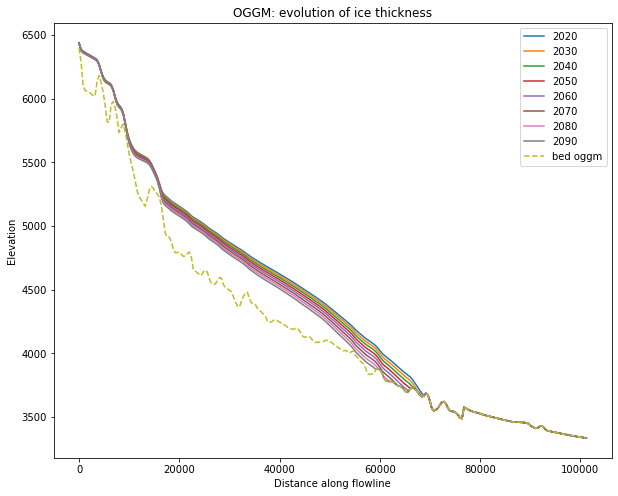

In [30]:
f, ax = plt.subplots(figsize=(10, 8))
for year in [2020,2030,2040,2050,2060,2070,2080,2090]:
    df_surf_oggm[[year]].plot(ax=ax);
    plt.legend()
df_bed_2[['bed oggm']].plot(ax=ax,ylabel='Elevation',style="--");
plt.legend()
plt.title('OGGM: evolution of ice thickness');
name = ''+gdir.name_corr+'_profil_evol_o.png'
plt.savefig(name, format = 'png')